# 비비빅 학습동아리 8회차_스터디
 - 2024.8.6.(화) 18:30~20:30
 - 타이타닉 컴피티션 진행

# 데이터셋 다운로드

In [ ]:
# 캐글 데이터 다운로드
!kaggle competitions download -c titanic

In [ ]:
# 압축풀기
import zipfile
import os

# zip 파일 경로
zip_file_path = './titanic.zip'

# 압축을 풀 폴더 경로
extract_folder = './titanic/'

# 폴더가 존재하지 않으면 생성
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

# zip 파일 열기
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # zip 파일의 모든 파일을 extract_folder에 압축 풀기
    zip_ref.extractall(extract_folder)

print("압축 해제 완료!")


# 라이브러리 임포트

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier


# 데이터 불러오기

In [ ]:
train = pd.read_csv('./titanic/train.csv')
train

In [ ]:
test = pd.read_csv('./titanic/test.csv')
test

# 데이터 탐색(EDA, Exploratory Data Analysis)
 - EDA(Exploratory Data Analysis)란
 - 데이터 분석 과정에서 데이터의 **주요 특성과 구조를 파악**하기 위해
 - **다양한 통계적 방법과 시각화**를 활용하는 절차를 의미
 - EDA는 데이터 분석의 초기 단계에서 수행되며, 데이터의 패턴, 관계, 이상치, 분포 등을 이해하는데 도움을 줍니다.  
 -> (초기 단계에서 수행한다고 되어있으나, 분석작업 진행중에도 필요한 경우 얼마든지 추가로 수행 가능)

In [ ]:
# 탐색을 위한 데이터 합치기
x = pd.concat([train, test], axis=0)
x

In [ ]:
x.columns

In [ ]:
# survived를 맨 뒤로 옮겨주자
x = x[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']]
x

In [ ]:
x.info()

In [ ]:
x.describe()

## EDA result (데이터를 훑어본 결과)
- x df 확인 결과
  - 1309 rows, 12컬럼으로 구성
- 컬럼을 각각 살펴보면
  - ID 관련: PassengerId
  - Feature 관련
    - text: Name, Ticket
    - 숫자형: , Age, SibSp, Parch, Fare
    - 범주형: Pclass, Sex, Cabin, Embarked  
    -> Feature(컬럼, 데이터 특성) 를 어떻게 가공하는지에 따라(데이터 전처리) 이후의 분석방법, 모델 성능이 완전히 달라지게 됨.

## 예측모델 구축 전략
- text 컬럼은 drop  
   -> 물론 추가 eda를 통해 뭔가 데이터를 추출할 수도 있음(다음시간에)
- 숫자와 범주만을 이용해서 모델을 만들어보자

## 결측값 확인
 - 결측값이란, 데이터의 비어있는 값을 말함
 - n/a, null

In [ ]:
# 결측값 비율을 구해보자
# 총 데이터 갯수는 len(x) 로 구한다, 아니면 x df에서 나오는 정보로 확인
len(x)   #1309

In [ ]:
# 결측값 수
x.isnull().sum()

In [ ]:
# 결측값의 시각화
import seaborn as sns
sns.heatmap(x.isnull())

heatmap
 - 주로 corr 보는데 사용함.  
    상관계수 (Correlation Coefficient): 두 변수 간의 선형 관계를 수치로 나타낸 값입니다. 값의 범위는 -1에서 1 사이이며, 다음과 같은 의미를 가집니다:  
    1: 완벽한 양의 상관관계 (하나의 변수가 증가할 때 다른 변수도 증가)  
    -1: 완벽한 음의 상관관계 (하나의 변수가 증가할 때 다른 변수는 감소)  
    0: 상관관계가 없음 (변수 간에 선형 관계가 없음)  
 - 본 예제에서는 결측값 시각화에 사용함  
 


# 데이터셋 구축

In [ ]:
#column category
# x.columns 해서 컬럼 리스트를 복사하자
drop_col = ['PassengerId', 'Name', 'Ticket', 'Cabin' ]  # 텍스트 등 별 의미없어보이는 데이터는 제외
cat_col = ['Pclass', 'Sex', 'Embarked']
num_col = ['Age','SibSp','Parch','Fare']

In [ ]:
x_train = train[num_col + cat_col]
x_train

In [ ]:
y_train = train['Survived']
y_train

In [ ]:
x_test = test[num_col + cat_col]
x_test

In [ ]:
x_train = train[num_col + cat_col]
x_train

# 모델 구축

## 범주형 변수 인코딩

In [ ]:
## 변수 인코딩 - x_train
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(x_train[cat_col])
ohe_result = ohe.transform(x_train[cat_col])
ohe_result = pd.DataFrame(ohe_result, columns =  ohe.get_feature_names_out())
ohe_result
x_train_ohe = pd.concat([x_train[num_col], ohe_result], axis=1)

x_train_ohe
#x_test[cat_col] = ohe.transform(x_test[cat_col])

In [ ]:
## 변수 인코딩 - x_test
ohe_result = ohe.transform(x_test[cat_col])
ohe_result = pd.DataFrame(ohe_result, columns = ohe.get_feature_names_out())
x_test_ohe = pd.concat([x_test[num_col], ohe_result], axis=1)

x_test_ohe
#x_test[cat_col] = ohe.transform(x_test[cat_col])

In [ ]:
## 변수 인코딩 - x_train, x_test
from sklearn.preprocessing import LabelEncoder

for col in cat_col:
    le = LabelEncoder()
    le.fit(x_train[col])
    x_train.loc[:, col] = le.transform(x_train[col])
    x_test.loc[:, col]  = le.transform(x_test[col])

x_train

In [ ]:
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(x_train['Pclass'].values.reshape(-1, 1))
ohe_result = ohe.transform(x_train['Pclass'].values.reshape(-1, 1))
ohe_result

### one-hot encoding 의 이해
 딱 하나만(one), 1로 표시한다는 것  
 regression에서 dummy variable의 처리에 해당

In [ ]:
x_train['Pclass'].unique(), x_train['Sex'].unique(), x_train['Embarked'].unique()

Pclass -> 3개,  
Sex -> 2개,  
Embarked 4개   

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
model

In [ ]:
y_pred = model.predict(x_test)
result = pd.DataFrame(y_pred, columns=['Survived'])

result = pd.concat([test['PassengerId'],result], axis=1)
result

In [ ]:
result.to_csv('random_forest_label.csv', index=False)

# 결과 제출(샘플 답안 제출하는 방법)

In [ ]:
# 캐글 컴피티션 제출
# gender_submission?
## 성별을 기준으로 생존여부를 판별해서 제출.
!kaggle competitions submit -c titanic -f "./random_forest_label.csv" -m "random forest"

- 캐글에서 제출결과를 확인해보자
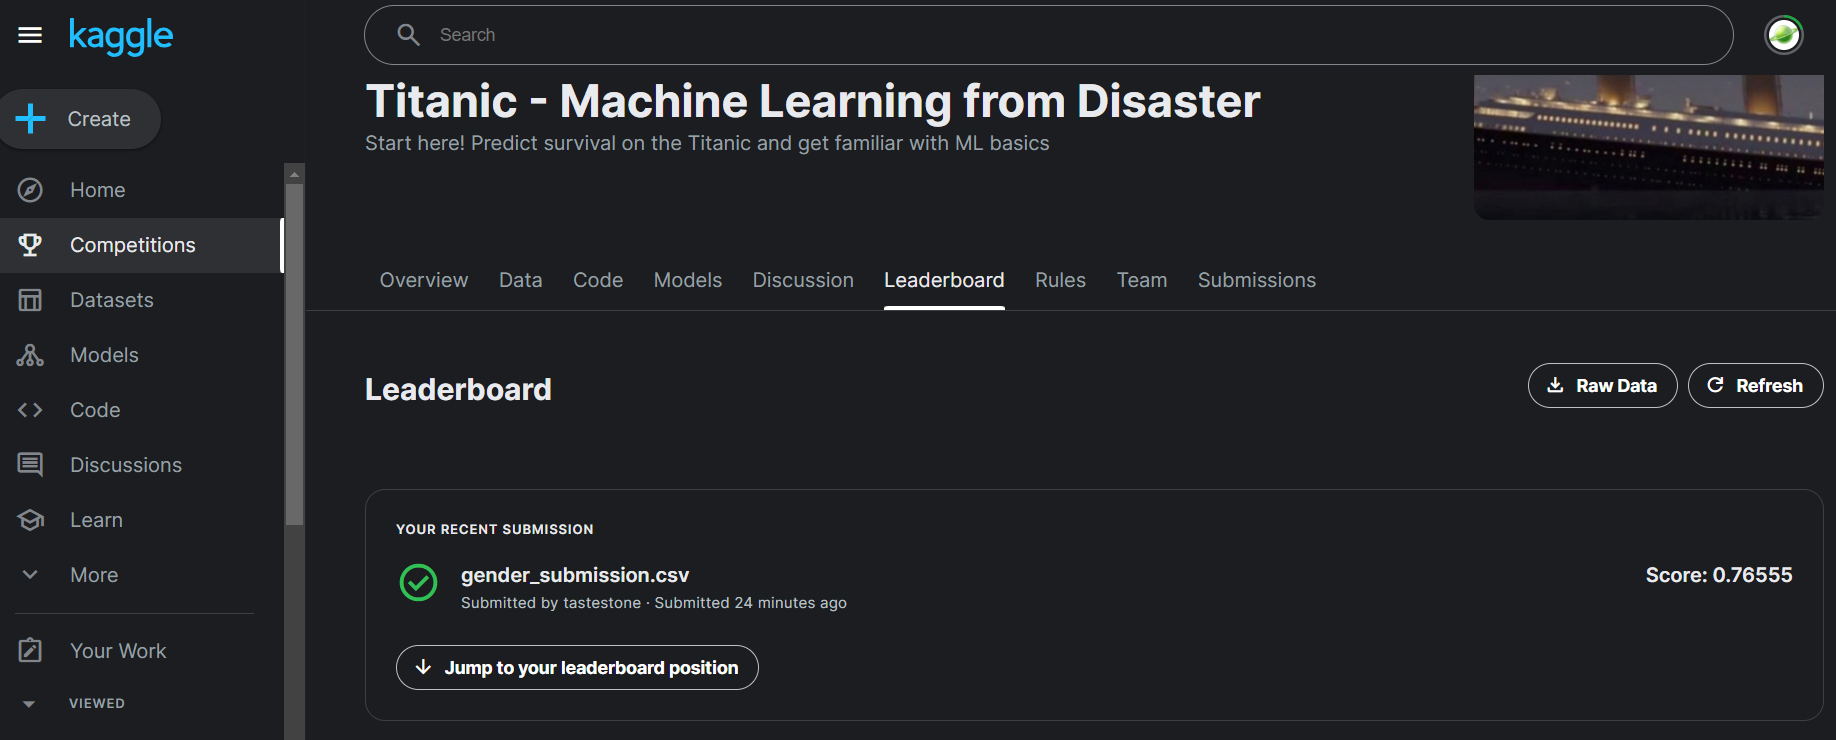